First 5 rows of the dataset:
   Sales  Profit   Region         Category
0    240    -103     East  Office Supplies
1    744    -141  Central  Office Supplies
2    382     -87    South       Technology
3    257     115  Central       Technology
4    179     264     East  Office Supplies

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sales     100 non-null    int32 
 1   Profit    100 non-null    int32 
 2   Region    100 non-null    object
 3   Category  100 non-null    object
dtypes: int32(2), object(2)
memory usage: 2.5+ KB

Statistical Summary : 
            Sales      Profit
count  100.000000  100.000000
mean   544.040000   48.800000
std    267.325509  153.679386
min    113.000000 -197.000000
25%    308.000000  -72.000000
50%    527.000000   30.500000
75%    792.750000  190.500000
max    999.000000  293.000000

Number of duplic

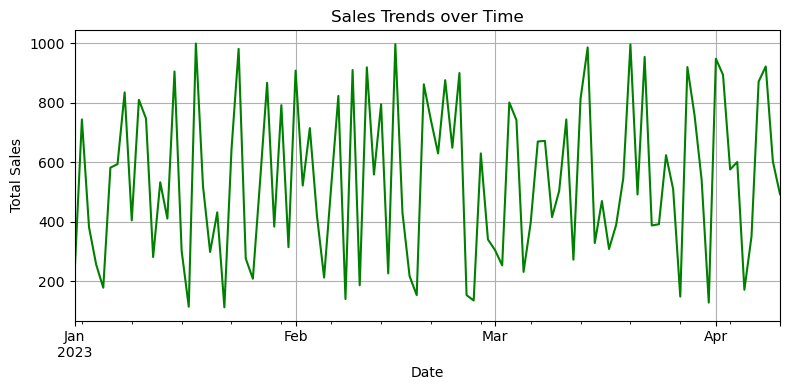

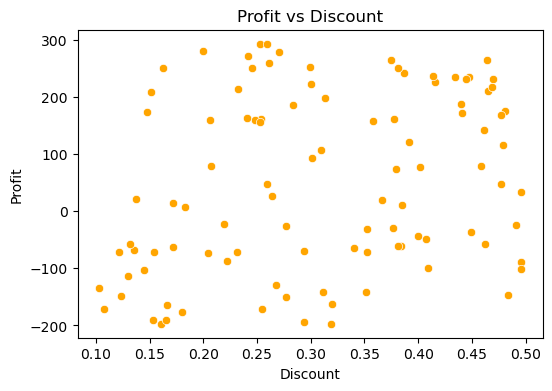

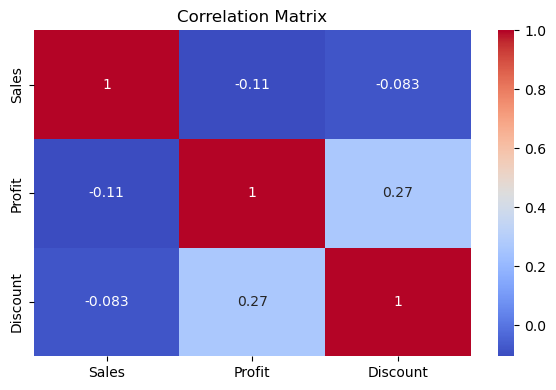

R² Score: -0.0644176879947298
MSE: 74180.37567074825


In [30]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate dataset
data = {
    'Sales': np.random.randint(100, 1000, 100),
    'Profit': np.random.randint(-200, 300, 100),
    'Region': np.random.choice(['East', 'West', 'Central', 'South'], 100),
    'Category': np.random.choice(['Furniture', 'Technology', 'Office Supplies'], 100)
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Basic Information about the dataset
print("\nDataset Information")
df.info()

# Statistical summary of numerical columns
print("\nStatistical Summary : ")
print(df.describe())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
print(f"\nMissing values before cleaning:\n{df.isnull().sum()}")

# There won't be missing values in simulated data, but this is for safety
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print("\nData after cleaning:")
print(df.head())

# Add Date column
df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

# --- Visualizations ---



# Add Discount column (optional)
df['Discount'] = np.random.uniform(0.1, 0.5, len(df))

# Plot Sales Trends over time
plt.figure(figsize=(8, 4))
df.groupby('Date')['Sales'].sum().plot(kind='line', color='green')
plt.title("Sales Trends over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot: Profit vs Discount
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

# Heatmap for correlation 
plt.figure(figsize=(6, 4))
numeric_corr = df.select_dtypes(include='number').corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Select Features and Target 
X = df[['Profit', 'Discount']]
y = df['Sales']

# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train The Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
